## Pharmacy consumable drugs

### Data set which I got having four sub set according to month wise ie. oct-2022, nov-2022,dec-2022and jan 2023 
#### Task - To find any particular pattern if thier is 

In [1]:
# importing necessary librarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# As all the subset hving same column name I am merging all the subset and making a single data frame 
df = pd.read_excel("oct.xlsx")
df1=pd.read_excel("nov.xlsx")
df2=pd.read_excel("dec.xlsx")
df3=pd.read_excel("jan.xlsx")

In [3]:
#New data frame df4
df4=pd.concat([df,df1,df2,df3], axis=0)
df4

,Claim Header Id,Particular,Price,Quantity,Created date,Hospital Name
0,110202210030313383,THROMBEXIN STOCKINGS -SMALL,2000.00,1.00,2022-10-01 10:06:35.721,aighospitals
1,110202210030313383,DISCOFIX 10CM EXTENSION,110.00,1.00,2022-10-01 10:06:35.742,aighospitals
2,110202210030313383,IV SETS TRANS FLOW,212.00,1.00,2022-10-01 10:06:35.759,aighospitals
3,110202210030313383,RL 500ML,56.42,1.00,2022-10-01 10:06:35.778,aighospitals
4,110202210030313383,NITRILE GLOVES-MEDIUM,1400.00,0.04,2022-10-01 10:06:35.802,aighospitals
...,...,...,...,...,...,...
8945,601202317195615284,MIKACIN 500MG/2ML(HSN:3004 2099) (PMIS016639374),109.00,2.00,2023-01-06 17:32:27.856,apollogleneagleskolkata
8946,601202317195615284,TRINERVE CAPS(HSN:3004) (PMIS016639374),15.50,4.00,2023-01-06 17:32:27.876,apollogleneagleskolkata
8947,601202317195615284,JDILIV 300 MG TAB 15's(HSN:30049036) (PMIS0166...,46.28,8.00,2023-01-06 17:32:27.893,apollogleneagleskolkata
8948,601202317195615284,sub total,2350.31,0.00,2023-01-06 17:32:27.911,apollogleneagleskolkata


In [6]:
df4.columns

Index(['Claim Header Id', 'Particular', 'Price', 'Quantity', 'Created date',
       'Hospital Name'],
      dtype='object')

### Column Detail
#### Claim Header Id- Identifier of the practitioner who provided the product or service to the patient.
#### Particular- Products  which was billed.
#### Price - price of the particular product.
#### Quantity- number of that particular product at the time of billing
#### Created date -  Date of the billing along with time 
#### Hospital name - Name of Hospital in which the transaction happens

In [7]:
# Checking for the nulls
df4.isnull().sum()

Claim Header Id    0
Particular         0
Price              0
Quantity           0
Created date       0
Hospital Name      0
dtype: int64

#### No Null value present in the data set

In [8]:
# now identifying the duplicates
df7=df4.duplicated(subset = None, keep ='first')
df7

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 86506, dtype: bool

#### No duplicates also

In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86506 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Claim Header Id  86506 non-null  int64  
 1   Particular       86506 non-null  object 
 2   Price            86506 non-null  float64
 3   Quantity         86506 non-null  float64
 4   Created date     86506 non-null  object 
 5   Hospital Name    86506 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [10]:
# Checking number of unique values in each column
df4.nunique().to_frame("No of Unique Values")

,No of Unique Values
Claim Header Id,949
Particular,51988
Price,6701
Quantity,139
Created date,86505
Hospital Name,19


No of unique of created date columns is very much large as compared to date involve in data collection.
so here i decided to saparate time constrain from the created date columns.So it will be easy to work with it.

In [11]:
df4['Created date'] = pd.to_datetime(df4['Created date'])

In [12]:
df4['Date_New'] = df4['Created date'].dt.date
df4['time'] = df4['Created date'].dt.time
df4

,Claim Header Id,Particular,Price,Quantity,Created date,Hospital Name,Date_New,time
0,110202210030313383,THROMBEXIN STOCKINGS -SMALL,2000.00,1.00,2022-10-01 10:06:35.721,aighospitals,2022-10-01,10:06:35.721000
1,110202210030313383,DISCOFIX 10CM EXTENSION,110.00,1.00,2022-10-01 10:06:35.742,aighospitals,2022-10-01,10:06:35.742000
2,110202210030313383,IV SETS TRANS FLOW,212.00,1.00,2022-10-01 10:06:35.759,aighospitals,2022-10-01,10:06:35.759000
3,110202210030313383,RL 500ML,56.42,1.00,2022-10-01 10:06:35.778,aighospitals,2022-10-01,10:06:35.778000
4,110202210030313383,NITRILE GLOVES-MEDIUM,1400.00,0.04,2022-10-01 10:06:35.802,aighospitals,2022-10-01,10:06:35.802000
...,...,...,...,...,...,...,...,...
8945,601202317195615284,MIKACIN 500MG/2ML(HSN:3004 2099) (PMIS016639374),109.00,2.00,2023-01-06 17:32:27.856,apollogleneagleskolkata,2023-01-06,17:32:27.856000
8946,601202317195615284,TRINERVE CAPS(HSN:3004) (PMIS016639374),15.50,4.00,2023-01-06 17:32:27.876,apollogleneagleskolkata,2023-01-06,17:32:27.876000
8947,601202317195615284,JDILIV 300 MG TAB 15's(HSN:30049036) (PMIS0166...,46.28,8.00,2023-01-06 17:32:27.893,apollogleneagleskolkata,2023-01-06,17:32:27.893000
8948,601202317195615284,sub total,2350.31,0.00,2023-01-06 17:32:27.911,apollogleneagleskolkata,2023-01-06,17:32:27.911000


In [13]:
df4.drop("Created date",axis=1,inplace=True)
df4

,Claim Header Id,Particular,Price,Quantity,Hospital Name,Date_New,time
0,110202210030313383,THROMBEXIN STOCKINGS -SMALL,2000.00,1.00,aighospitals,2022-10-01,10:06:35.721000
1,110202210030313383,DISCOFIX 10CM EXTENSION,110.00,1.00,aighospitals,2022-10-01,10:06:35.742000
2,110202210030313383,IV SETS TRANS FLOW,212.00,1.00,aighospitals,2022-10-01,10:06:35.759000
3,110202210030313383,RL 500ML,56.42,1.00,aighospitals,2022-10-01,10:06:35.778000
4,110202210030313383,NITRILE GLOVES-MEDIUM,1400.00,0.04,aighospitals,2022-10-01,10:06:35.802000
...,...,...,...,...,...,...,...
8945,601202317195615284,MIKACIN 500MG/2ML(HSN:3004 2099) (PMIS016639374),109.00,2.00,apollogleneagleskolkata,2023-01-06,17:32:27.856000
8946,601202317195615284,TRINERVE CAPS(HSN:3004) (PMIS016639374),15.50,4.00,apollogleneagleskolkata,2023-01-06,17:32:27.876000
8947,601202317195615284,JDILIV 300 MG TAB 15's(HSN:30049036) (PMIS0166...,46.28,8.00,apollogleneagleskolkata,2023-01-06,17:32:27.893000
8948,601202317195615284,sub total,2350.31,0.00,apollogleneagleskolkata,2023-01-06,17:32:27.911000


In [14]:
# Use pandas.to_datetime() to convert string to datetime format
df4["Date_New"] = pd.to_datetime(df4["Date_New"])
# Convert and store in another column
df4["NewDate"] = pd.to_datetime(df4["Date_New"])

# Using DataFrame.astype() function
df4["Date_New"] = df4["Date_New"].astype('datetime64[ns]')

# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
df4["Date_New"] =  pd.to_datetime(df4["Date_New"], format="%Y/%m/%d")

# Use pandas.to_datetime() to convert string to "yyyymmdd" format
df4["Date_New"] = pd.to_datetime(df4["Date_New"], format='%y%m%d')

In [15]:
df4.drop("NewDate",axis=1,inplace=True)
df4

,Claim Header Id,Particular,Price,Quantity,Hospital Name,Date_New,time
0,110202210030313383,THROMBEXIN STOCKINGS -SMALL,2000.00,1.00,aighospitals,2022-10-01,10:06:35.721000
1,110202210030313383,DISCOFIX 10CM EXTENSION,110.00,1.00,aighospitals,2022-10-01,10:06:35.742000
2,110202210030313383,IV SETS TRANS FLOW,212.00,1.00,aighospitals,2022-10-01,10:06:35.759000
3,110202210030313383,RL 500ML,56.42,1.00,aighospitals,2022-10-01,10:06:35.778000
4,110202210030313383,NITRILE GLOVES-MEDIUM,1400.00,0.04,aighospitals,2022-10-01,10:06:35.802000
...,...,...,...,...,...,...,...
8945,601202317195615284,MIKACIN 500MG/2ML(HSN:3004 2099) (PMIS016639374),109.00,2.00,apollogleneagleskolkata,2023-01-06,17:32:27.856000
8946,601202317195615284,TRINERVE CAPS(HSN:3004) (PMIS016639374),15.50,4.00,apollogleneagleskolkata,2023-01-06,17:32:27.876000
8947,601202317195615284,JDILIV 300 MG TAB 15's(HSN:30049036) (PMIS0166...,46.28,8.00,apollogleneagleskolkata,2023-01-06,17:32:27.893000
8948,601202317195615284,sub total,2350.31,0.00,apollogleneagleskolkata,2023-01-06,17:32:27.911000


In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86506 entries, 0 to 8949
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Claim Header Id  86506 non-null  int64         
 1   Particular       86506 non-null  object        
 2   Price            86506 non-null  float64       
 3   Quantity         86506 non-null  float64       
 4   Hospital Name    86506 non-null  object        
 5   Date_New         86506 non-null  datetime64[ns]
 6   time             86506 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.3+ MB


In [19]:
# Checking the value counts of each columns
for i in df4.columns:
        print(df4[i].value_counts())
        print('*'*100)

3012202212214047333    2786
601202315523608660     1243
601202312155139757     1206
1911202213130047429     920
711202209554084550      852
                       ... 
2312202221494873018       1
2312202222091431269       1
2312202222141068082       1
2412202213181033164       1
601202317332632534        1
Name: Claim Header Id, Length: 949, dtype: int64
****************************************************************************************************
sub total                                               4232
OMNIVAN 10MLSYRINGE                                      779
NS 100MLFLEXI DRIP                                       640
IV SETS TRANS FLOW                                       597
OMNIVAN 5ML SYRINGE                                      529
                                                        ... 
CALPOL 650MG TAB(HSN:30049069 PMIS124736630)               1
DC ALCOHOL SWAB 100S #(HSN:90189099) (PMIS124736619)       1
DC FACE MASK 3 PLY IND(HSN:62103090) PMIS124736619    

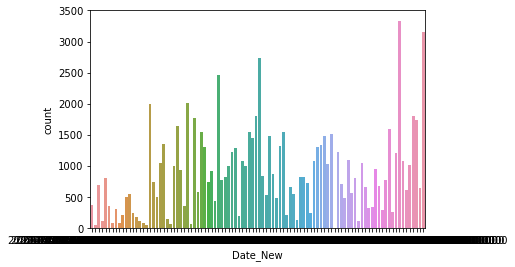

<Figure size 720x720 with 0 Axes>

In [20]:
sns.countplot(df4['Date_New'])
plt.figure(figsize=(10, 10))
plt.show()

In [21]:
# Now checking for numerical columns
numerical_columns=[]
for i in df4.dtypes.index:
    if df4.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Claim Header Id', 'Price', 'Quantity', 'Date_New']


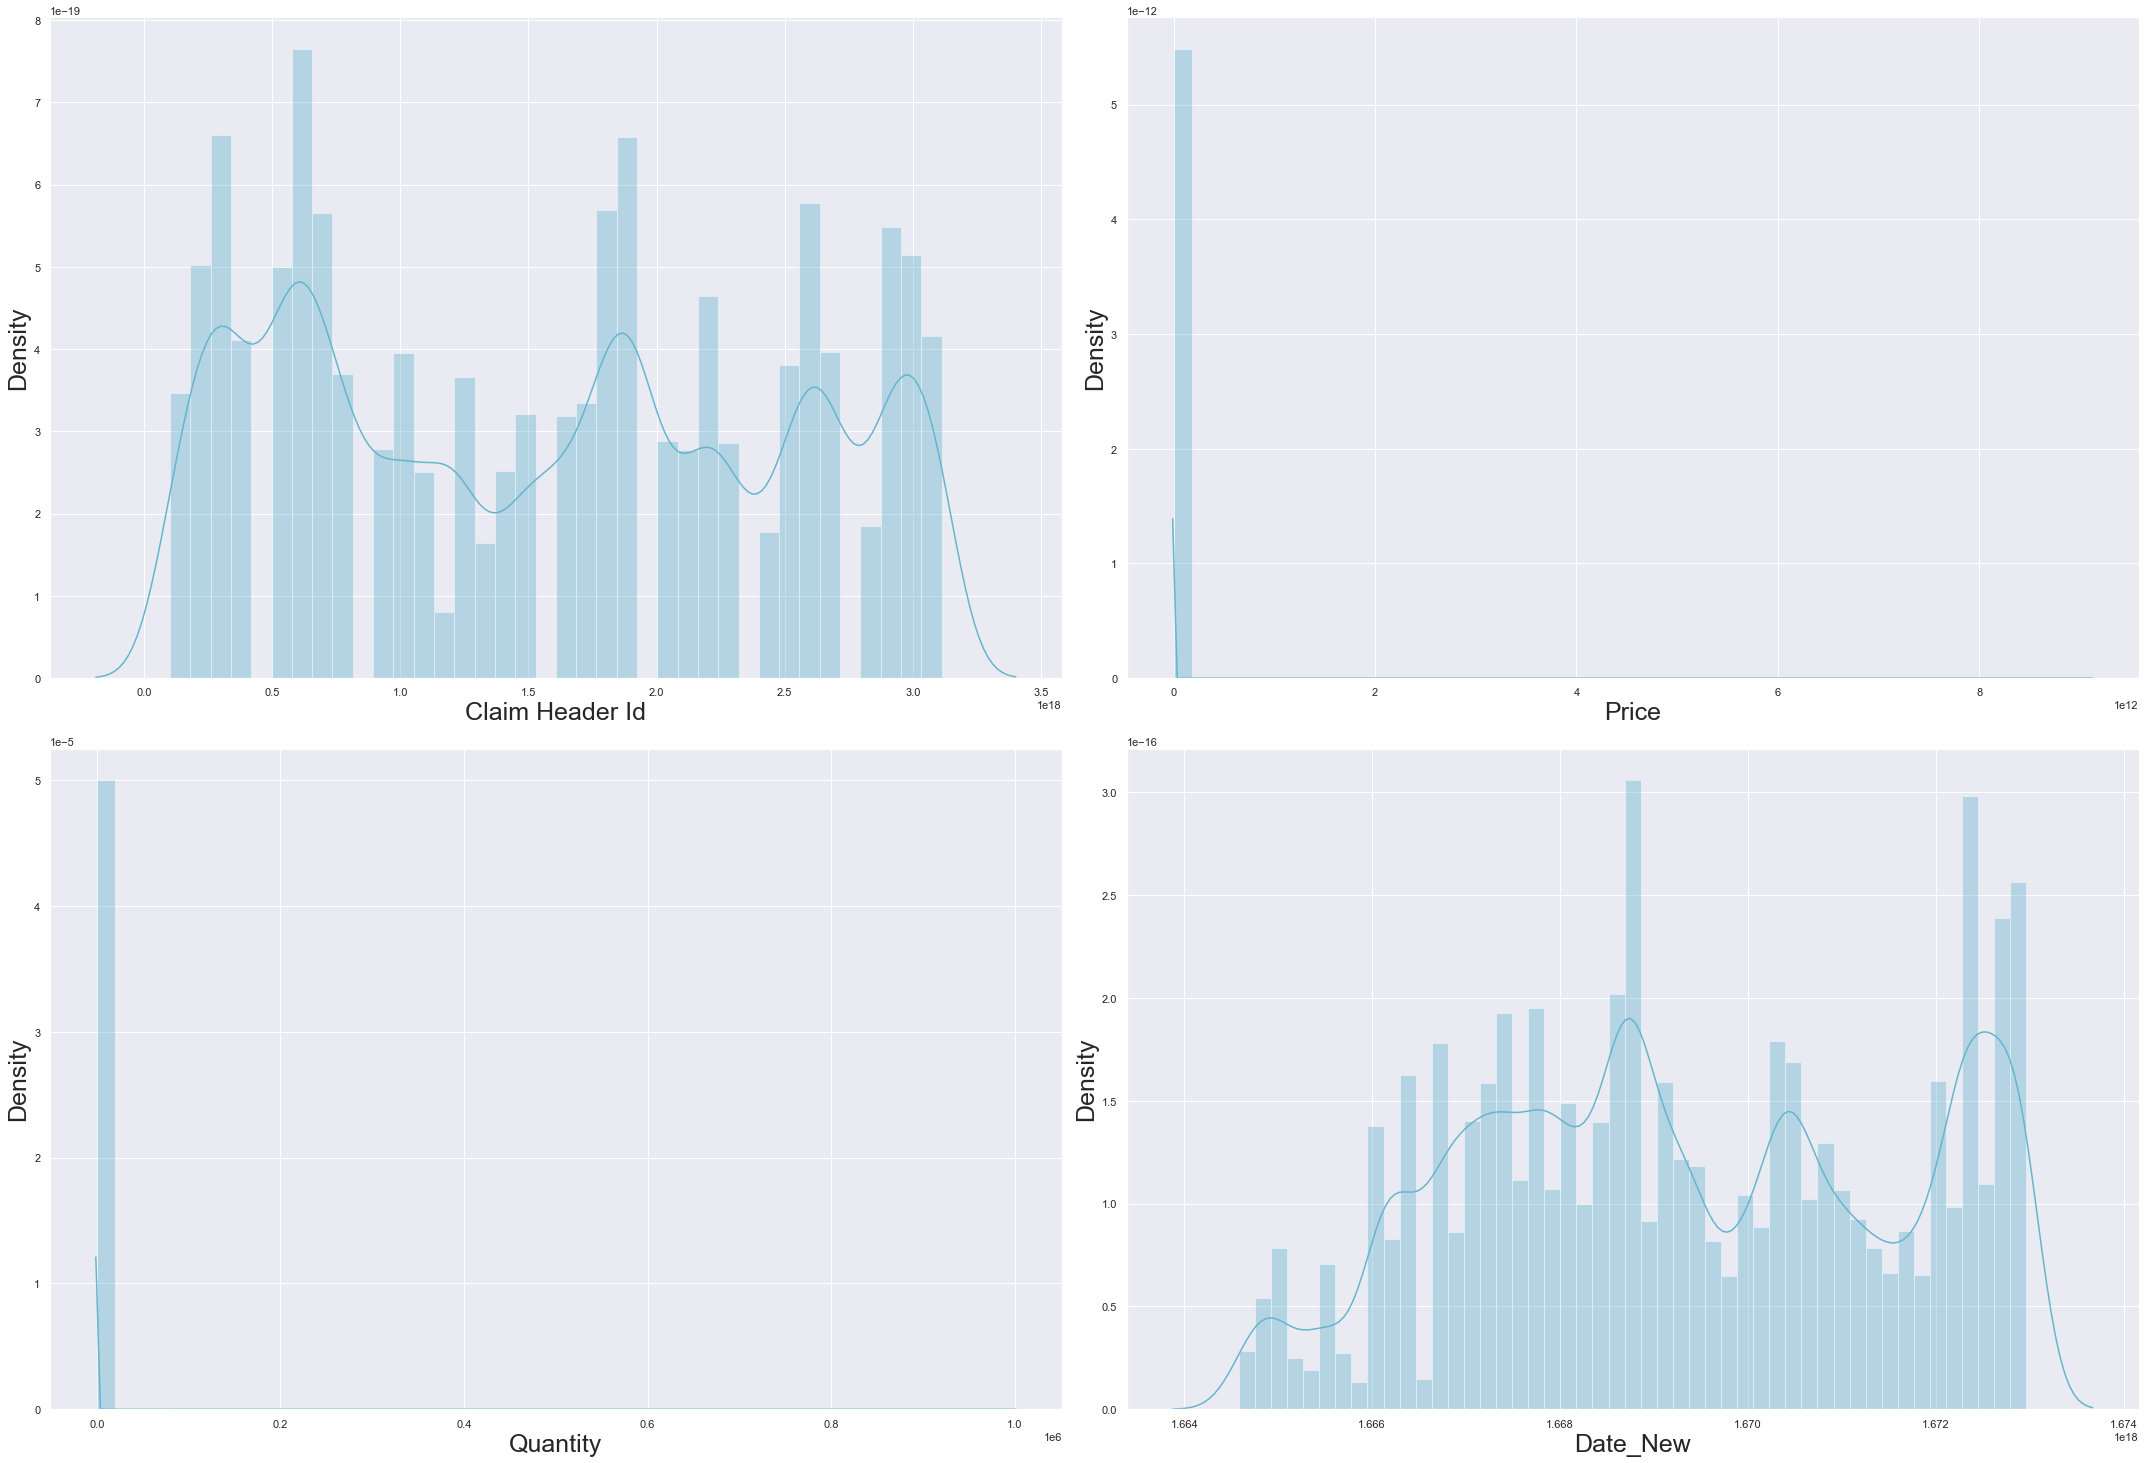

In [22]:
#Distribution plot for all numerical columns
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in df4[numerical_columns]:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df4[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()

### Findings-

### Claim Header Id-
Claim Header Id included date also which says the date of billing .
According to the Value counts Claim Header Id-3012202212214047333 showing   2786 transactions which is maximum among all the dataset.date of transaction is 30/12/2022
followed by Claim Header Id -601202315523608660 showing 1243 and 601202312155139757 which showing 1206
 both the Claim Header Id belongs to 6th of jan 2023
 
 
### Particulars-
Particulas belongs to injectible/ surgical categories showing maximum transaction
 
##### OMNIVAN 10MLSYRINGE                                      779
##### NS 100MLFLEXI DRIP                                       640
##### IV SETS TRANS FLOW                                       597
##### OMNIVAN 5ML SYRINGE                                      529

### Hospital name -

As the number of hospital from where the data has been collected is 19 but out of 19 maximum data has been collected from 'indraprasthaapollo' -31831 followed by apollohyd-18335 and aighospitals- 14756 
and the least number of data has been taken from-
##### apolobhubaneshwar              1
##### lilavati                       1
##### deenanath                      1
##### hinduja                        1

As the data collected is different from different hospitals some are very large number and some are very less.so data is not balanced 

### Date new - 
Data collected from2022-12-30  showing maximum transaction 3334 out of which 2786 transactions is from Claim Header Id-3012202212214047333 
followed by 2023-01-06    which showing 3151 transactions
Date not showing any particular pattern 

### Time - 
According to value counts maximum transaction happens in 2nd half of the day which indicates that the 2nd hour is might be the time at which the maximum OT (operation Theatre ) activity is going on as maximum injectible is particulars .
 
 